In [1]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_random_forest_reg(X_columns, y_columns, data)
    set_predictions(mod

### <span style='color:green'> **[done]** </span>Loading stat_model trained data:

In [2]:
loc = '../data/'
file = 'fight_stat_data_trained.csv'
df = pd.read_csv(loc+file)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6826,validation,2017-07-29,Kailin Curran,Aleksandra Albu,lose,U-DEC:,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739,0.144664,0.144664,0.144664,0.144664
6827,train,2017-07-29,Jarred Brooks,Eric Shelton,win,S-DEC:,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286,-0.209890,-0.209890,-0.209890,-0.209890
6828,validation,2017-07-29,Drew Dober,Joshua Burkman,win,KO/TKO:Punch,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961,0.310882,0.310882,0.310882,0.310882


In [3]:
req_data = ['set','date','fighter','opponent','method']
y = ['result']
X = ['kd_dif','str_dif','td_dif','sub_dif',
    'td avg._dif','td acc._dif','td def._dif','sub. avg._dif',
    'slpm_dif','str. acc._dif','sapm_dif','str. def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif']

df = df[req_data + X + y]
df.tail(3)

,set,date,fighter,opponent,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
6826,validation,2017-07-29,Kailin Curran,Aleksandra Albu,U-DEC:,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739,lose
6827,train,2017-07-29,Jarred Brooks,Eric Shelton,S-DEC:,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286,win
6828,validation,2017-07-29,Drew Dober,Joshua Burkman,KO/TKO:Punch,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961,win


## <span style='color:green'> **[done]** </span> Random forest classifier model training:

In [4]:
rf_clf = set_random_forest_clf(X_columns=X, y_columns=y, data=df, n=10)
df = set_predictions(model=rf_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,date,fighter,opponent,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6826,validation,2017-07-29,Kailin Curran,Aleksandra Albu,U-DEC:,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739,lose,win
6827,train,2017-07-29,Jarred Brooks,Eric Shelton,S-DEC:,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286,win,win
6828,validation,2017-07-29,Drew Dober,Joshua Burkman,KO/TKO:Punch,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961,win,win


Accuracy = 0.852419


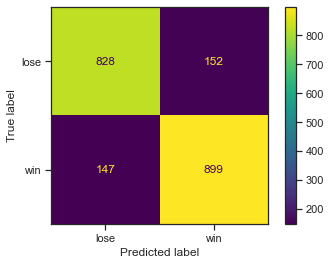

In [6]:
get_model_evaluation(data=df,y_column='result')

#### <span style='color:green'> **[done]** </span> Tune Model parameters:

In [7]:
sum_table = pd.DataFrame(columns=['n_estimators','accuracy'])

for n in tqdm([2,4,8,16,32,64,128,256]):
    sum_table = pd.concat([sum_table,get_clf_grad_desc_step( X_columns=X, y_columns=y, data=df, neighbors=n)],ignore_index=True)

sum_table.tail(5)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.03it/s]


,n_estimators,accuracy
3,16,0.862259
4,32,0.864325
5,64,0.863636
6,128,0.866391
7,256,0.865702


,n_estimators,accuracy
0,128,0.866391


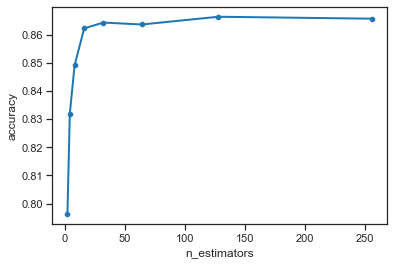

In [8]:
sns.scatterplot(data=sum_table, x='n_estimators', y='accuracy')
sns.lineplot(data=sum_table, x='n_estimators', y='accuracy')

t = sum_table[sum_table.accuracy == np.max(sum_table['accuracy'])].reset_index(drop=True)
opt_n_estimators = t.loc[0,'n_estimators']
opt_acc = t.loc[0,'accuracy']
t

#### <span style='color:green'> **[done]** </span> Saving tuned parameters:

In [9]:
gp = pd.read_csv('../global_variables/ml_models_parameters.csv')
gp = gp[gp.ml_model != 'random_forest_classifier'].reset_index(drop=True)

param = pd.DataFrame(data={'ml_model':['random_forest_classifier'],
                          'parameter_name':['n_estimator'],
                          'value':[opt_n_estimators],
                          'accuracy':[opt_acc]}
                    )
gp = pd.concat([gp,param],ignore_index=True)
gp.to_csv('../global_variables/ml_models_parameters.csv', index=None)
print('../global_variables/ml_models_parameters.csv saved.')
gp

../global_variables/ml_models_parameters.csv saved.


,ml_model,parameter_name,value,accuracy
0,random_forest_regressor,n_estimator,256,0.883400
1,random_forest_classifier,n_estimator,128,0.866391


#### <span style='color:green'> **[done]** </span> Train model with chosen parameters:

In [10]:
rf_clf = set_random_forest_clf(X_columns=X, y_columns=y, data=df, n=opt_n_estimators)
df = set_predictions(model=rf_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,date,fighter,opponent,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6826,validation,2017-07-29,Kailin Curran,Aleksandra Albu,U-DEC:,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739,lose,lose
6827,train,2017-07-29,Jarred Brooks,Eric Shelton,S-DEC:,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286,win,win
6828,validation,2017-07-29,Drew Dober,Joshua Burkman,KO/TKO:Punch,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961,win,win


#### <span style='color:green'> **[done]** </span> Tuned model score:

Accuracy = 0.859822


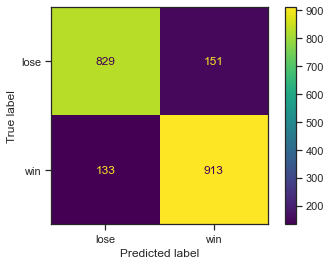

In [11]:
get_model_evaluation(data=df,y_column='result')

In [12]:
df.to_csv('../data/fight_result_data_trained.csv',index=None)
print('../data/fight_result_data_trained.csv saved.')

../data/fight_result_data_trained.csv saved.
